# Assignment 3: Non-Linear Models and Validation Metrics (37 total marks)
### Due: October 24 at 11:59pm

### Name: Ehsan Liaqat

### In this assignment, you will need to write code that uses non-linear models to perform classification and regression tasks. You will also be asked to describe the process by which you came up with the code. More details can be found below. Please cite any websites or AI tools that you used to help you with this assignment.

### Import Libraries

In [97]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Part 1: Regression (14.5 marks)

For this section, we will be continuing with the concrete example from yellowbrick. You will need to compare these results to the results from the previous assignment. Please use the results from the solution if you were unable to complete Assignment 2

### Step 1: Data Input (0.5 marks)

The data used for this task can be downloaded using the yellowbrick library: 
https://www.scikit-yb.org/en/latest/api/datasets/concrete.html

Use the yellowbrick function `load_concrete()` to load the concrete dataset into the feature matrix `X` and target vector `y`.

In [98]:
# TO DO: Import concrete dataset from yellowbrick library

from yellowbrick.datasets import load_concrete
X,y = load_concrete()
#print(X)
#print(y)

### Step 2: Data Processing (0 marks)

Data processing was completed in the previous assignment. No need to repeat here.

### Step 3: Implement Machine Learning Model

1. Import the Decision Tree, Random Forest and Gradient Boosting Machines regression models from sklearn
2. Instantiate the three models with `max_depth = 5`. Are there any other parameters that you will need to set?
3. Implement each machine learning model with `X` and `y`

In [99]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor

#split the data

X_tr, X_val, y_tr, y_val = train_test_split(X,y, random_state=0)

DT_model = DecisionTreeRegressor(random_state=0, max_depth=5)
RF_model = RandomForestRegressor(random_state=0, max_depth=5)
GB_model = GradientBoostingRegressor(random_state=0, max_depth=5)

DT_model.fit(X_tr, y_tr)
RF_model.fit(X_tr, y_tr)
GB_model.fit(X_tr,y_tr)




GradientBoostingRegressor(max_depth=5, random_state=0)

### Step 4: Validate Model

Calculate the average training and validation accuracy using mean squared error with cross-validation. To do this, you will need to set `scoring='neg_mean_squared_error'` in your `cross_validate` function and negate the results (multiply by -1)

In [105]:
from sklearn.model_selection import cross_validate

score_DT_cval = cross_validate(DT_model, X_tr, y_tr, cv=5, scoring='neg_mean_squared_error', return_train_score=True)
score_RF_cval = cross_validate(RF_model, X_tr, y_tr, cv=5, scoring='neg_mean_squared_error', return_train_score=True)
score_GB_cval = cross_validate(GB_model, X_tr, y_tr, cv=5, scoring='neg_mean_squared_error', return_train_score=True)

#print(score_DT_cval['train_score'].mean()*-1)
#print(score_DT_cval['test_score'].mean()*-1)


print("Decision Tree Train Score MSE = {:.5f}".format(score_DT_cval['train_score'].mean()*-1))
print("Decision Tree Val Score MSE = {:.5f}".format(score_DT_cval['test_score'].mean()*-1))

print("RandomForest Train Score MSE = {:.5f}".format(score_RF_cval['train_score'].mean()*-1))
print("RandomForest Val Score MSE = {:.5f}".format(score_RF_cval['test_score'].mean()*-1))

print("GradientBoosting Train Score MSE = {:.5f}".format(score_GB_cval['train_score'].mean()*-1))
print("GradientBoosting Val Score MSE = {:.5f}".format(score_GB_cval['test_score'].mean()*-1))

Decision Tree Train Score MSE = 47.27976
Decision Tree Val Score MSE = 73.44733
RandomForest Train Score MSE = 29.57745
RandomForest Val Score MSE = 45.05935
GradientBoosting Train Score MSE = 3.37944
GradientBoosting Val Score MSE = 22.78322


### Step 5: Visualize Results (4 marks)

1. Create a pandas DataFrame `results` with columns: Training accuracy and Validation accuracy, and index: DT, RF and GB
2. Add the accuracy results to the `results` DataFrame
3. Print `results`

In [102]:
# TO DO: ADD YOUR CODE HERE FOR STEPS 3-5
# Note: for any random state parameters, you can use random_state = 0
# HINT: USING A LOOP TO STORE THE DATA IN YOUR RESULTS DATAFRAME WILL BE MORE EFFICIENT

columns_add = ['training accuracy', 'validation accuracy']
ind_add = ['DT','RF','GB']
model_cv = [score_DT_cval, score_RF_cval, score_GB_cval]

results = pd.DataFrame(columns=columns_add, index = ind_add)

for model, cv in zip(ind_add, model_cv):
    results.loc[model] = ["{:.5f}".format(cv['train_score'].mean()*-1), "{:.5f}".format(cv['test_score'].mean()*-1)]

print(results)


   training accuracy validation accuracy
DT          47.27976            73.44733
RF          29.57745            45.05935
GB           3.37944            22.78322


Repeat the step above to print the R2 score instead of the mean-squared error. For this case, you can use `scoring='r2'`

In [106]:
# TO DO: ADD YOUR CODE HERE

score_DT_cval = cross_validate(DT_model, X_tr, y_tr, cv=5, scoring='r2', return_train_score=True)
score_RF_cval = cross_validate(RF_model, X_tr, y_tr, cv=5, scoring='r2', return_train_score=True)
score_GB_cval = cross_validate(GB_model, X_tr, y_tr, cv=5, scoring='r2', return_train_score=True)

#print(score_DT_cval['train_score'].mean()*-1)
#print(score_DT_cval['test_score'].mean()*-1)


print("Decision Tree Train Score r2 = {:.5f}".format(score_DT_cval['train_score'].mean()))
print("Decision Tree Val Score r2 = {:.5f}".format(score_DT_cval['test_score'].mean()))

print("RandomForest Train Score r2 = {:.5f}".format(score_RF_cval['train_score'].mean()))
print("RandomForest Val Score r2 = {:.5f}".format(score_RF_cval['test_score'].mean()))

print("GradientBoosting Train Score r2 = {:.5f}".format(score_GB_cval['train_score'].mean()))
print("GradientBoosting Val Score r2 = {:.5f}".format(score_GB_cval['test_score'].mean()))

columns_add = ['training accuracy', 'validation accuracy']
ind_add = ['DT','RF','GB']
model_cv = [score_DT_cval, score_RF_cval, score_GB_cval]

results = pd.DataFrame(columns=columns_add, index = ind_add)

for model, cv in zip(ind_add, model_cv):
    results.loc[model] = ["{:.5f}".format(cv['train_score'].mean()), "{:.5f}".format(cv['test_score'].mean())]

print(results)

Decision Tree Train Score r2 = 0.83447
Decision Tree Val Score r2 = 0.73870
RandomForest Train Score r2 = 0.89656
RandomForest Val Score r2 = 0.84093
GradientBoosting Train Score r2 = 0.98817
GradientBoosting Val Score r2 = 0.91947
   training accuracy validation accuracy
DT           0.83447             0.73870
RF           0.89656             0.84093
GB           0.98817             0.91947


### Questions (6 marks)
1. How do these results compare to the results using a linear model in the previous assignment? Use values.

1. Out of the models you tested, which model would you select for this dataset and why?

1. If you wanted to increase the accuracy of the tree-based models, what would you do? Provide two suggestions.


*ANSWER HERE*

1. Compared to the linear model used in the last assignment, we see a significant improvement using Decision Tree, Random Forest and Gradient Boosting. In the linear model from last assignment, we got R2 scores of 0.61 for training and 0.62 for validation and 111 MSE for training and 95 MSE for the validation. The non linear provide much higher R2 scores for training and validation. The best R2 score for training and validation are the following, 1st GradientBoost with 0.988 for training and 0.919 for validation, 2nd RandomForest with 0.896 for training and 0.840 for validation, 3rd DecisionTree with 0.834 for training and 0.738 for validation. For MSE, 1st GradientBoost with 3.379 for training and 22.783 for validation, 2nd RandomForest with 29.577 for training and 45.059 for validation, 3rd DecisionTree with 47.279 for training and 73.447 for validation
2. The GradientBoost with R2 scores of 0.988 for training and 0.919 for validation and MSE of 3.379 for training and 22.783 for validation is the preferred model. It has very high performance in the training and good fit, not overfitting or underfitting.
3. We can try different depth levels to see the model performance. With more depth, we have more nodes, which will increase model accuracy as there are more parameters that are testing. Another option is to increase n_estimators to increase how many trees can be generated which can increase accuracy.

### Process Description (4 marks)
Please describe the process you used to create your code. Cite any websites or generative AI tools used. You can use the following questions as guidance:
1. Where did you source your code?
1. In what order did you complete the steps?
1. If you used generative AI, what prompts did you use? Did you need to modify the code at all? Why or why not?
1. Did you have any challenges? If yes, what were they? If not, what helped you to be successful?

*DESCRIBE YOUR PROCESS HERE*
1. I used the examples posted on the D2L to source my code.
2. I completed my steps in sequence, one after another and followed the examples posted online.
3. No I did not use generative AI since I didn't have time.
4. Yes, trying understand the deeper details of how the models can increase accuracy for the same dataset.

## Part 2: Classification (17.5 marks)

You have been asked to develop code that can help the user classify different wine samples. Following the machine learning workflow described in class, write the relevant code in each of the steps below:

### Step 1: Data Input (2 marks)

The data used for this task can be downloaded from UCI: https://archive.ics.uci.edu/dataset/109/wine

Use the pandas library to load the dataset. You must define the column headers if they are not included in the dataset 

You will need to split the dataset into feature matrix `X` and target vector `y`. Which column represents the target vector?

Print the size and type of `X` and `y`

In [109]:
# TO DO: Import wine dataset
import os
import requests

def load_wine():

    file_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data'
    file_name = file_url.split('/')[-1]
    
    if not os.path.isfile(file_name):
        print('Downloading from {}'.format(file_url))
        r = requests.get(file_url)
        with open(file_name,'wb') as output_file:
            output_file.write(r.content)
        
    data = pd.read_csv(file_name, 
                   na_values='?', 
                   names=['class', 'Alcohol', 'Malicacid', 'Ash', 'Alcalinity_of_ash', 'Magnesium',
                            'Total_phenols', 'Flavanoids', 'Nonflavanoid_phenols', 'Proanthocyanins', 'Color_intensity',
                            'Hue', '0D280_0D315_of_diluted_wines', 'Proline'])
    
    return data

data = load_wine()

X = data.drop(columns=['class'])
y = data['class']

print(X.size, X.shape, type(X))
print(y.size, y.shape, type(y))

2314 (178, 13) <class 'pandas.core.frame.DataFrame'>
178 (178,) <class 'pandas.core.series.Series'>


### Step 2: Data Processing (1.5 marks)

Print the first five rows of the dataset to inspect:

In [110]:
# TO DO: ADD YOUR CODE HERE
print(data.head())

   class  Alcohol  Malicacid   Ash  Alcalinity_of_ash  Magnesium  \
0      1    14.23       1.71  2.43               15.6        127   
1      1    13.20       1.78  2.14               11.2        100   
2      1    13.16       2.36  2.67               18.6        101   
3      1    14.37       1.95  2.50               16.8        113   
4      1    13.24       2.59  2.87               21.0        118   

   Total_phenols  Flavanoids  Nonflavanoid_phenols  Proanthocyanins  \
0           2.80        3.06                  0.28             2.29   
1           2.65        2.76                  0.26             1.28   
2           2.80        3.24                  0.30             2.81   
3           3.85        3.49                  0.24             2.18   
4           2.80        2.69                  0.39             1.82   

   Color_intensity   Hue  0D280_0D315_of_diluted_wines  Proline  
0             5.64  1.04                          3.92     1065  
1             4.38  1.05        

Check to see if there are any missing values in the dataset. If necessary, select an appropriate method to fill-in the missing values

In [111]:
# TO DO: ADD YOUR CODE HERE
print(data.isnull().sum())

print("Total Null ", data.isnull().sum().sum())

class                           0
Alcohol                         0
Malicacid                       0
Ash                             0
Alcalinity_of_ash               0
Magnesium                       0
Total_phenols                   0
Flavanoids                      0
Nonflavanoid_phenols            0
Proanthocyanins                 0
Color_intensity                 0
Hue                             0
0D280_0D315_of_diluted_wines    0
Proline                         0
dtype: int64
Total Null  0


How many samples do we have of each type of wine?

In [112]:
# TO DO: ADD YOUR CODE HERE

print(y.value_counts())

class
2    71
1    59
3    48
Name: count, dtype: int64


### Step 3: Implement Machine Learning Model

1. Import `SVC` and `DecisionTreeClassifier` from sklearn
2. Instantiate models as `SVC()` and `DecisionTreeClassifier(max_depth = 3)`
3. Implement the machine learning model with `X` and `y`

In [116]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

X_tr, X_val, y_tr, y_val = train_test_split(X,y, random_state=0)

DTC_model = DecisionTreeClassifier(max_depth=3, random_state=0).fit(X_tr, y_tr)
SVC_model = SVC(random_state=0).fit(X_tr, y_tr)


### Step 4: Validate Model 

Calculate the average training and validation accuracy using `cross_validate` for the two different models listed in Step 3. For this case, use `scoring='accuracy'`

In [118]:
score_DTC_cval = cross_validate(DTC_model, X_tr, y_tr, cv=5, scoring='accuracy', return_train_score=True)
score_SVC_cval = cross_validate(SVC_model, X_tr, y_tr, cv=5, scoring='accuracy', return_train_score=True)

#print(score_DT_cval['train_score'].mean()*-1)
#print(score_DT_cval['test_score'].mean()*-1)

print("DecisionTreeClassifier Train Score Accuracy = {:.5f}".format(score_DTC_cval['train_score'].mean()))
print("DecisionTreeClassifier Val Score Accuracy = {:.5f}".format(score_DTC_cval['test_score'].mean()))


print("SVC Train Score Accuracy = {:.5f}".format(score_SVC_cval['train_score'].mean()))
print("SVC Val Score Accuracy = {:.5f}".format(score_SVC_cval['test_score'].mean()))


DecisionTreeClassifier Train Score Accuracy = 0.99436
DecisionTreeClassifier Val Score Accuracy = 0.89402
SVC Train Score Accuracy = 0.68043
SVC Val Score Accuracy = 0.67664


### Step 5: Visualize Results (4 marks)

#### Step 5.1: Compare Models
1. Create a pandas DataFrame `results` with columns: Training accuracy and Validation accuracy
2. Add the data size, training and validation accuracy for each dataset to the `results` DataFrame
3. Print `results`

In [119]:
# TO DO: ADD YOUR CODE HERE FOR STEPS 3-5
# Note: for any random state parameters, you can use random_state = 0
# HINT: USING A LOOP TO STORE THE DATA IN YOUR RESULTS DATAFRAME WILL BE MORE EFFICIENT

columns_add = ['data size', 'training accuracy', 'validation accuracy']
ind_add = ['DTC','SVC']
model_cv = [score_DTC_cval, score_SVC_cval]

results = pd.DataFrame(columns=columns_add, index = ind_add)

for model, cv in zip(ind_add, model_cv):
    results.loc[model] = [X_tr.shape, "{:.5f}".format(cv['train_score'].mean()), "{:.5f}".format(cv['test_score'].mean())]

print(results)

     data size training accuracy validation accuracy
DTC  (133, 13)           0.99436             0.89402
SVC  (133, 13)           0.68043             0.67664


#### Step 5.2: Visualize Classification Errors
Which method gave the highest accuracy? Use this method to print the confusion matrix and classification report:

In [120]:
# TO DO: Implement best model

from sklearn.metrics import confusion_matrix

mat = confusion_matrix(y_val, DTC_model.predict(X_val))
print(mat)


[[14  2  0]
 [ 0 20  1]
 [ 0  0  8]]


Text(170.97222222222223, 0.5, 'true value')

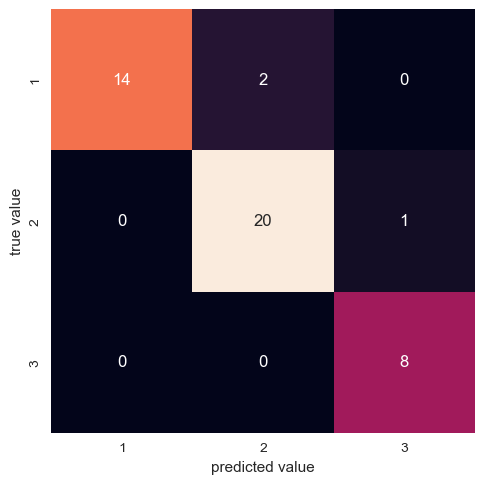

In [121]:
# TO DO: Print confusion matrix using a heatmap


sns.heatmap(mat, xticklabels=[1,2,3], yticklabels=[1,2,3], square=True, annot=True, cbar=False)
plt.xlabel('predicted value')
plt.ylabel('true value')


In [122]:
# TO DO: Print classification report

from sklearn.metrics import classification_report
print(classification_report(y_val,DTC_model.predict(X_val)))

              precision    recall  f1-score   support

           1       1.00      0.88      0.93        16
           2       0.91      0.95      0.93        21
           3       0.89      1.00      0.94         8

    accuracy                           0.93        45
   macro avg       0.93      0.94      0.93        45
weighted avg       0.94      0.93      0.93        45



### Questions (6 marks)
1. How do the training and validation accuracy change depending on the method used? Explain with values.
1. What are two reasons why the support vector machines model did not work as well as the tree-based model?
1. How many samples were incorrectly classified in step 5.2? 
1. In this case, is maximizing precision or recall more important? Why?

*YOUR ANSWERS HERE*

1. The DecisionTreeClassifier gave much higher accuracy. The acurracy results for DecisionTreeClassifier are 0.994 for traning and 0.894 for validation. For SVC the accuracy results are 0.680 for training and 0.676 for validation. See how DecisionTreeClassifier is a better fit, it would be the better model.

2. The SVC model is very responsive to data scaling, as we can see the data has float values as low as 0.01 to over 1000, which are widely apart. This may cause poor performance of the SVM mode. Another issue is adjustmnent of tuning parameters so the SVC model can perform better was not carried out. If we can fine tune the parameters of the SVC model we might be able to see an improvement.

3. 3 samples

4. Recall means capturing as many positive IDs as possible. With increasing recall, precision will go down. That suggests that model becomes less accurate. In this case, with three types of wine, we need to maximize precision and improve accuracy, because an accurate model will increase ID of wine. Here having false positive will be harmful.

### Process Description (4 marks)
Please describe the process you used to create your code. Cite any websites or generative AI tools used. You can use the following questions as guidance:
1. Where did you source your code?
1. In what order did you complete the steps?
1. If you used generative AI, what prompts did you use? Did you need to modify the code at all? Why or why not?
1. Did you have any challenges? If yes, what were they? If not, what helped you to be successful?

1. I used the posted examples on D2L
2. In sequence, steps 1 - 5
3. Yes a little to understand why SVC can perform poorly. I asked "What causes SVM to perform worse than DecisionTreeClassifier and explain it". I did not modify the code.
4. Yes I had some issues running the code. Also issues with things not being defined. I fixed them by investigating them.


*DESCRIBE YOUR PROCESS HERE*

## Part 3: Observations/Interpretation (3 marks)

Describe any pattern you see in the results. Relate your findings to what we discussed during lectures. Include data to justify your findings.

With equal depth levels, we can compare the performane of different non linear models. Using the max depth of 5, the GradientBoost model was the best performer with the similar tree depth. The training score was 0.988 and validation score was 0.919. The GradientBoost model can achieve higher performance by developing multiple trees iteratively. The RandomForest came in second with training score of 0.896 and validation score of 0.840. It is an ensemble of decision tree and improves upon decision tree using multiple trees with different features which increase accuracy. Decision tree has the lowest performance but better than the linear model. It has a training accuracy of 0.834 and validation accuracy of 0.738. Both RandomForest and GradientBoost are improved version of the DecisionTree, which is seen in the accuracy results. The second part demonstrates that without fine tuning parameters, or choosing a non suitable model for data, where scaling is high, you can run into many performance issues. As seen in the SVC model, the performance is significantly worse than the DecisionTreeClassifier model.


*ADD YOUR FINDINGS HERE*

## Part 4: Reflection (2 marks)
Include a sentence or two about:
- what you liked or disliked,
- found interesting, confusing, challangeing, motivating
while working on this assignment.


*ADD YOUR THOUGHTS HERE*

- I liked the layout and user friendliness of the assignment. I like the format as it follows assignnment 2
- The concepts are still very challenging to understand.

## Part 5: Bonus Question (3 marks)

Repeat Part 2 and compare the support vector machines model used to `LinearSVC(max_iter=5000)`. Does using `LinearSVC` improve the results? Why or why not?

Is `LinearSVC` a good fit for this dataset? Why or why not?

In [123]:
# TO DO: ADD YOUR CODE HERE

X_tr2 = X_tr
y_tr2 = y_tr

from sklearn.svm import LinearSVC
linear_svm = LinearSVC(max_iter=5000, random_state=0).fit(X_tr2, y_tr2)

score_SVM_cval= cross_validate(linear_svm, X_tr2, y_tr2, cv=5, scoring='accuracy', return_train_score=True)

print("SVM Train Score Accuracy = {:.5f}".format(score_SVM_cval['train_score'].mean()))
print("SVM Val Score Accuracy = {:.5f}".format(score_SVM_cval['test_score'].mean()))


c:\Users\Asus\.conda\envs\ensf-ml\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
c:\Users\Asus\.conda\envs\ensf-ml\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\Asus\.conda\envs\ensf-ml\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
c:\Users\Asus\.conda\envs\ensf-ml\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\Asus\.conda\envs\ensf-ml\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to 

SVM Train Score Accuracy = 0.86829
SVM Val Score Accuracy = 0.84986


c:\Users\Asus\.conda\envs\ensf-ml\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


*ANSWER HERE*

The LinearSVC model seems to perform better than the SVC model, with training accuracy of 0.868 and validation accuracy 0.849. Compared to SVC, it is much better. Perhaps for the data, going with with a linear based model is better suited.